<a href="https://colab.research.google.com/github/Kot71nsk/Car_Price/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_price/vehicles.csv', usecols=['price', 'year', 'manufacturer', 'model', 'condition',
                                                                                           'cylinders', 'fuel', 'odometer', 'transmission',
                                                                                           'drive', 'type', 'paint_color'], nrows=100000)


**Графики зависимостей**

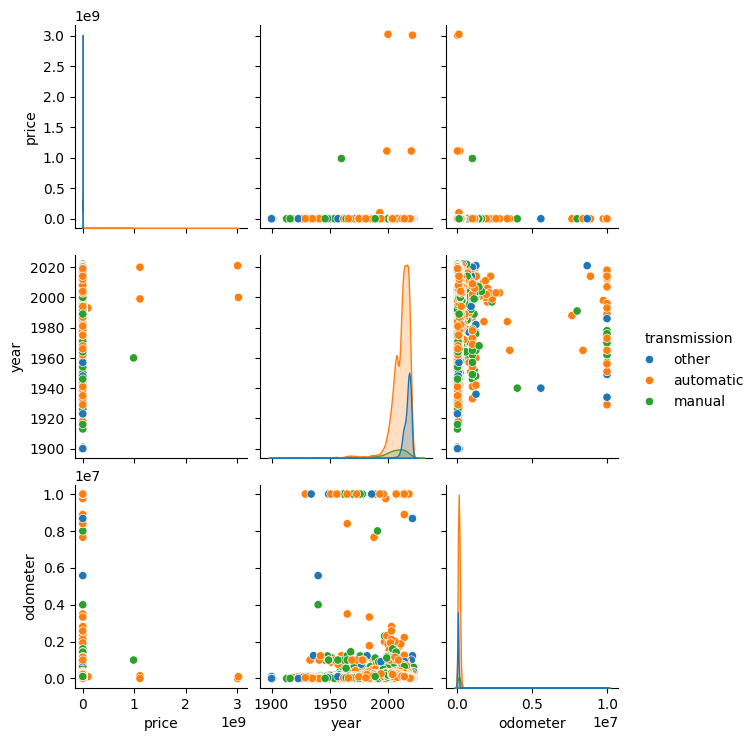

In [ ]:
sns.pairplot(
    data=df,
    aspect=.85,
    hue='transmission')

Text(0, 0.5, 'Цена')

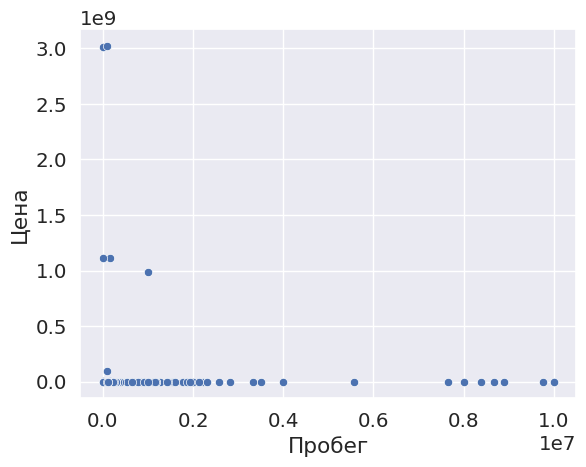

In [ ]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x='odometer',
    y='price',
    data=df)
plt.xlabel(
    'Пробег')
plt.ylabel(
    'Цена')

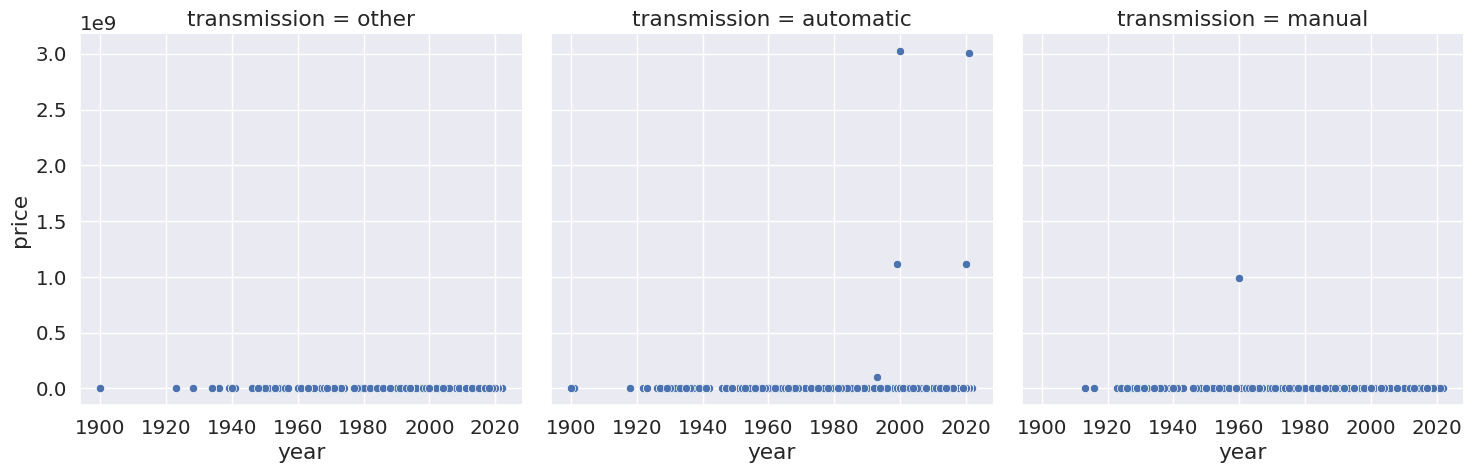

In [ ]:
sns.relplot(
    x='year',
    y='price',
    data=df,
    kind='scatter',
    col='transmission')

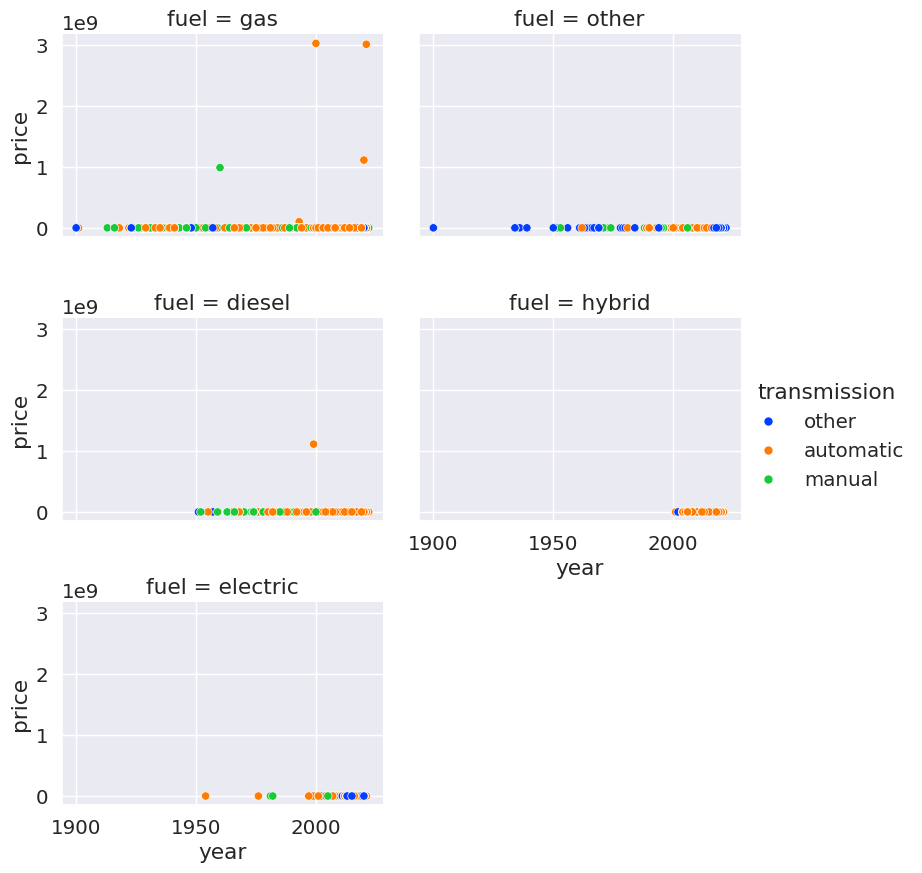

In [ ]:
sns.relplot(
    x='year',
    y='price',
    data=df,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter',
    hue='transmission',
    col='fuel',
    col_wrap=2)

<Axes: xlabel='year', ylabel='price'>

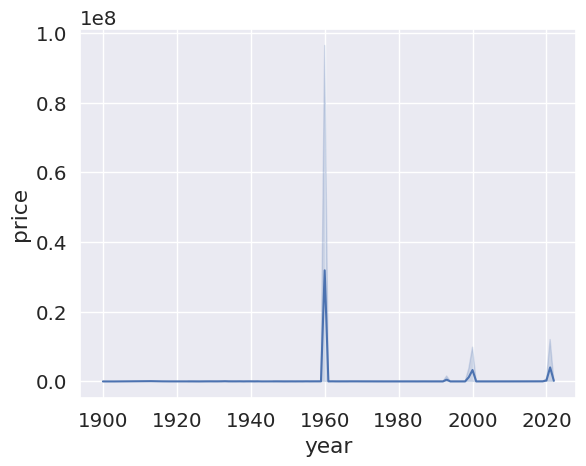

In [ ]:
sns.lineplot(
    x="year",
    y="price",
    data=df)

**Подготовка данных**

In [ ]:
df = df.dropna()

df['price'] = df['price'].astype(float)
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

df = pd.get_dummies(df, columns=['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission',
                                          'drive', 'type', 'paint_color'])

df[['price', 'year', 'odometer']] = df[['price', 'year', 'odometer']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Разделяем на тестовые и тренировочные данные
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)



<ipython-input-8-cdf36d3d8e4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
<ipython-input-8-cdf36d3d8e4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
<ipython-input-8-cdf36d3d8e4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

**Обучение разных моделей**

In [ ]:
# Модель xgbregression
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, max_depth=6, learning_rate=0.5)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'MAE XGBOOST: {mae_xgb:.2f}')
print(f'MSE XGBOOST: {mse_xgb:.2f}')

MAE XGBOOST: 0.00
MSE XGBOOST: 0.00


In [ ]:
# Модель LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

MAE: 0.00
MSE: 0.00


In [ ]:
#Модель деревьев решений
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

MAE: 0.00
MSE: 0.00


In [ ]:
# Модель Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

MAE: 0.00
MSE: 0.00


**Еще один график зависимостей**

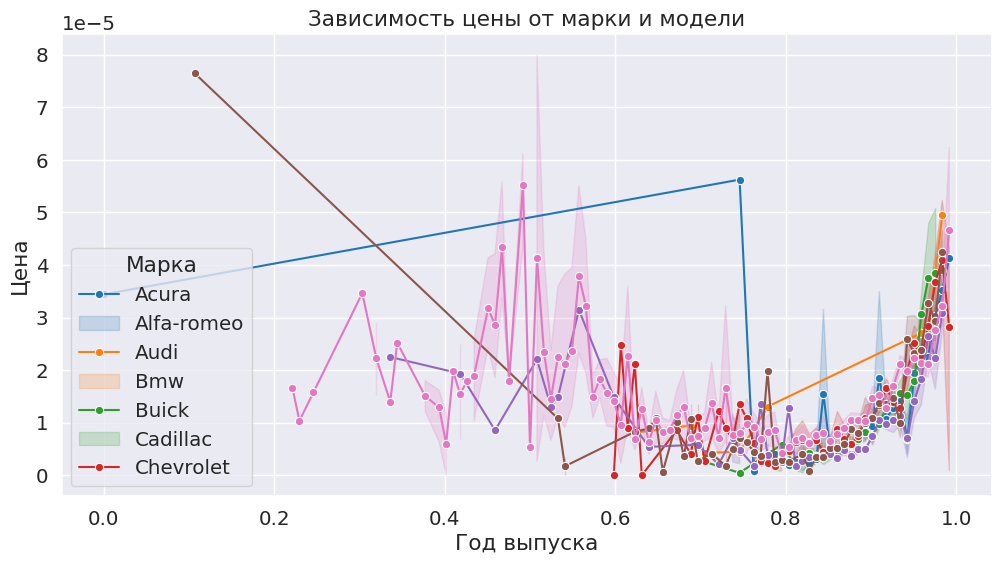

In [ ]:
# Преобразуем данные в длинный формат
melted_df = pd.melt(df, id_vars=['year', 'price'],
                     value_vars=['manufacturer_acura', 'manufacturer_alfa-romeo',
                                 'manufacturer_audi', 'manufacturer_bmw',
                                 'manufacturer_buick', 'manufacturer_cadillac',
                                 'manufacturer_chevrolet'],
                     var_name='manufacturer', value_name='is_manufacturer')

# Фильтруем только те строки, где марка равна 1
melted_df = melted_df[melted_df['is_manufacturer'] == 1]

# Удаляем столбец is_manufacturer, так как он больше не нужен
melted_df.drop(columns=['is_manufacturer'], inplace=True)

# Строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='year', y='price', hue='manufacturer',
             palette='tab10', marker='o')
plt.title('Зависимость цены от марки и модели')
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.legend(title='Марка', labels=[manufacturer.split('_')[1].capitalize() for manufacturer in melted_df['manufacturer'].unique()])
plt.show()